In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from scipy import stats  # 과학용 계산 라이브러리

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras




url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"



columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin','cname']



df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?') 






C:\Users\tyra\AppData\Local\Temp\ipykernel_24816\3726812448.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?')


In [3]:

# 결측값 처리 (horsepower 컬럼에 결측값 존재)
df = df.dropna()

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,cname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [5]:
# 컬렴명 확인
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'cname'],
      dtype='object')

Text(0.5, 1.0, 'mile per gallen')

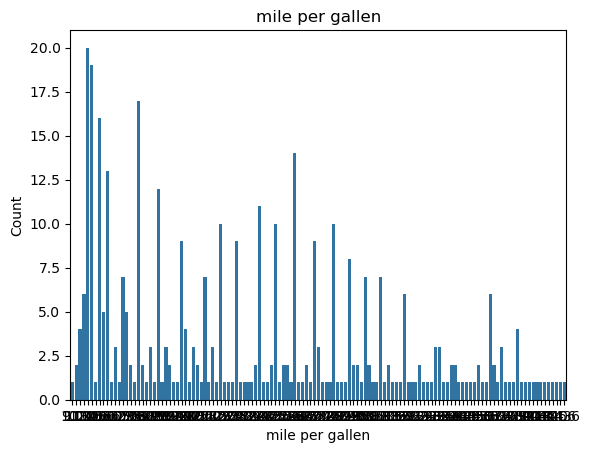

In [6]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="mpg") #df 데이터프레임에서 label 열의 값을 기준으로 각 레이블의 빈도수를 계산해 막대 그래프를 생성
plt.xlabel("mile per gallen") 
plt.ylabel("Count")
plt.title("mile per gallen") #그래프의 제목을 "Label"로 설정

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
cname           0
dtype: int64

In [8]:
df= df.drop('cname',axis=1)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [9]:
X=df.drop('mpg',axis=1)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1


In [10]:
y = df['mpg']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [11]:
from collections import Counter
import numpy as np

def split_sequence(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        seq_x = sequences[i:end_ix, :-1]
        seq_y_values = sequences[i:end_ix, -1]
        
        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        
        X.append(seq_x)
        y.append(most_common_label)
    
    return np.array(X), np.array(y)



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# 특성과 레이블 설정
X = df.drop('mpg', axis=1).values
y = df['mpg'].values

X_scaled = X

# 시퀀스 길이 설정
n_steps = 3  # 예시로 3개의 시퀀스를 사용

# 시퀀스 데이터 분할
X_seq, y_seq = split_sequence(X_scaled, n_steps)

In [13]:
# 회귀 문제에 맞게 훈련/테스트 데이터 분할
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# CNN + LSTM 모델 정의 (회귀용)
from tensorflow.keras import layers, models

model_reg = models.Sequential([
    layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, X_train.shape[2])),
    layers.MaxPooling1D(pool_size=2),
    layers.LSTM(50, activation='relu'),
    layers.Dense(1)  # 회귀 문제이므로 출력층은 1개
])

model_reg.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 모델 학습
history_reg = model_reg.fit(X_train, y_train_reg, epochs=50, batch_size=32, validation_split=0.2)

# 모델 평가
loss_reg, mae_reg = model_reg.evaluate(X_test, y_test_reg)
print(f'평가 손실 (회귀): {loss_reg}, 평균 절대 오차: {mae_reg}')

Epoch 1/50


C:\Users\tyra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 6357.0327 - mae: 64.2159 - val_loss: 2325.9709 - val_mae: 46.1090
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2061.4189 - mae: 38.9184 - val_loss: 386.9546 - val_mae: 16.0361
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 413.6904 - mae: 17.5677 - val_loss: 26.1491 - val_mae: 3.8744
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 86.4405 - mae: 6.6761 - val_loss: 68.6599 - val_mae: 7.2546
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.9973 - mae: 5.6136 - val_loss: 47.4205 - val_mae: 5.0162
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 70.4784 - mae: 6.4419 - val_loss: 28.6432 - val_mae: 4.6045
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 49.1849 - mae: 4.9004 - val_loss: 14.3584 - val_mae: 3.2166
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.7777 - mae: 4.5655 - val_loss: 13.5148 - val_mae: 3.1129
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28.7282 - mae